# Creating the ANN Model for IRIS Dataset

In [7]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data   # Features: sepal length, sepal width, petal length, petal width
y = iris.target # Labels: 0, 1, 2

# 2. One-hot encode the target (since we have 3 classes)
y_cat = to_categorical(y)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat, test_size=0.2, random_state=42
)

# 4. Scale the features
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# 5. Build the ANN model
model = Sequential([
    Dense(4, activation='relu', input_shape=(scaled_X_train.shape[1],)),
    Dense(8, activation='relu', input_shape=(scaled_X_train.shape[1],)),
    Dense(4, activation='relu', input_shape=(scaled_X_train.shape[1],)),
    Dense(3, activation='softmax')  # 3 classes in Iris dataset
])

# 6. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 7. Define EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True)

# 8. Train the model
history = model.fit(
    x=scaled_X_train,
    y=y_train,
    epochs=300,
    validation_data=(scaled_X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

# 9. Evaluate the model
loss, accuracy = model.evaluate(scaled_X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

c:\Users\abhiu\Downloads\Program Files\myvenv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):
c:\Users\abhiu\Downloads\Program Files\myvenv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - accuracy: 0.3167 - loss: 1.1945 - val_accuracy: 0.2333 - val_loss: 1.1918
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4083 - loss: 1.1837 - val_accuracy: 0.2667 - val_loss: 1.1823
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3750 - loss: 1.1729 - val_accuracy: 0.4000 - val_loss: 1.1727
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4083 - loss: 1.1633 - val_accuracy: 0.4667 - val_loss: 1.1634
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4250 - loss: 1.1536 - val_accuracy: 0.4667 - val_loss: 1.1545
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4250 - loss: 1.1443 - val_accuracy: 0.4000 - val_loss: 1.1458
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4250 - loss: 1.1361 - val_accuracy: 0.4000 - val_loss: 1.1377
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4000 - loss: 1.1277 - val_accuracy: 0.4000 - val_loss

In [8]:
metrics = pd.DataFrame(history.history)
metrics

,accuracy,loss,val_accuracy,val_loss
0,0.316667,1.194452,0.233333,1.191755
1,0.408333,1.183704,0.266667,1.182261
2,0.375000,1.172945,0.400000,1.172746
3,0.408333,1.163318,0.466667,1.163424
4,0.425000,1.153636,0.466667,1.154462
...,...,...,...,...
295,0.975000,0.060248,1.000000,0.042899
296,0.975000,0.059898,1.000000,0.042720
297,0.975000,0.059914,1.000000,0.042610
298,0.975000,0.059695,1.000000,0.042490


<Axes: >

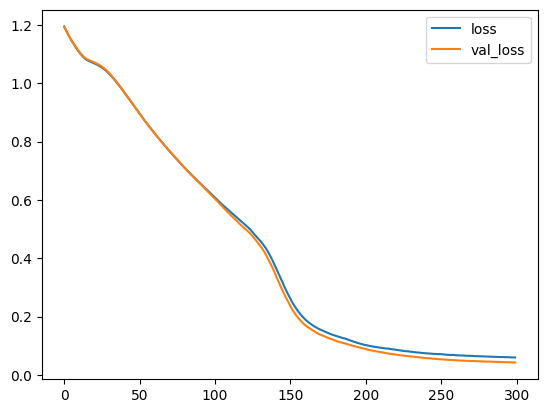

In [9]:
metrics[['loss', 'val_loss']].plot()

<Axes: >

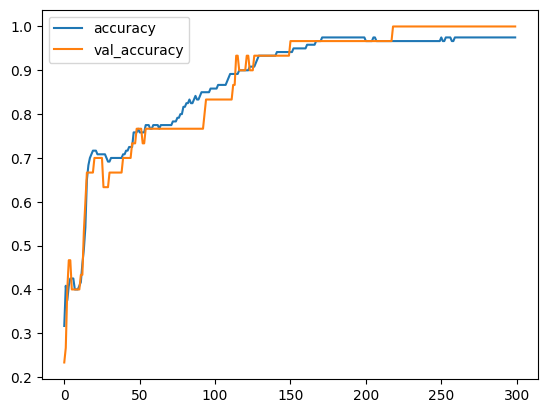

In [10]:
metrics[['accuracy', 'val_accuracy']].plot()

In [11]:
model.evaluate(scaled_X_test, y_test, verbose=0)

[0.04239252954721451, 1.0]

## Model deplotment

In [12]:
# Import libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data   # Features: sepal length, sepal width, petal length, petal width
y = iris.target # Labels: 0, 1, 2

# 2. One-hot encode the target (since we have 3 classes)
y_cat = to_categorical(y, num_classes=3)

# 3. Scale the features
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# 4. Build the ANN model
model = Sequential([
    Dense(16, activation='relu', input_shape=(scaled_X.shape[1],)),
    Dense(12, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes in Iris dataset
])

# 5. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 6. Define EarlyStopping
early_stop = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# 7. Train the model on the whole dataset
history = model.fit(
    x=scaled_X,
    y=y_cat,
    epochs=300,
    callbacks=[early_stop],
    verbose=1
)

# 8. Evaluate on the same dataset (since no split)
loss, accuracy = model.evaluate(scaled_X, y_cat, verbose=0)
print(f"Final Accuracy on full dataset: {accuracy:.4f}")

Epoch 1/300


c:\Users\abhiu\Downloads\Program Files\myvenv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5733 - loss: 0.9360
Epoch 2/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6000 - loss: 0.9070 
Epoch 3/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6067 - loss: 0.8803 
Epoch 4/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6133 - loss: 0.8544
Epoch 5/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6533 - loss: 0.8296
Epoch 6/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6733 - loss: 0.8051
Epoch 7/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6867 - loss: 0.7817
Epoch 8/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7000 - loss: 0.7581 
Epoch 9/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7067 - loss: 0.7345
Epoch 10/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7200 - loss: 0.7121 
Epoch 11/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7200 - loss: 0.6887
Epoch 12/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7400 - loss: 0.6666
E

In [13]:
model.save('final_iris.h5')

In [14]:
import joblib
joblib.dump(scaler, 'scaler_iris.pkl') 

['scaler_iris.pkl']

In [15]:
from tensorflow.keras.models import load_model
# Load the model
flower_model = load_model('final_iris.h5')

# Load the scaler
scaler = joblib.load('scaler_iris.pkl')


In [49]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [43]:
iris.target[0]

np.int64(0)

In [ ]:
flower_example = {"sepal_length": 5.1, "sepal_width": 3.5, "petal_length": 1.4, "petal_width": 0.2}

In [35]:
# Creating a function
def return_prediction(model, scaler, sample_json):
    s_len = sample_json["sepal_length"]
    s_wid = sample_json["sepal_width"]
    p_len = sample_json["petal_length"]
    p_wid = sample_json["petal_width"]

    flower =  [[s_len, s_wid, p_len, p_wid]]
    flower = scaler.transform(flower)
    
    classes = np.array(['setosa', 'versicolor', 'virginica'])

    class_ind = model.predict(flower)[0]

    return classes[np.argmax(class_ind)]

In [36]:
return_prediction(flower_model, scaler, flower_example)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


np.str_('setosa')

## Code for Deplyoment

In [ ]:
from tensorflow.keras.models import load_model
import joblib
import numpy as np

# Load the model
flower_model = load_model('final_iris.h5')

# Load the scaler
scaler = joblib.load('scaler_iris.pkl')

# Creating a function
def return_prediction(model, scaler, sample_json):
    s_len = sample_json["sepal_length"]
    s_wid = sample_json["sepal_width"]
    p_len = sample_json["petal_length"]
    p_wid = sample_json["petal_width"]

    flower =  [[s_len, s_wid, p_len, p_wid]]
    flower = scaler.transform(flower)
    
    classes = np.array(['setosa', 'versicolor', 'virginica'])

    class_ind = model.predict(flower)[0]

    return classes[np.argmax(class_ind)]
